# **Problem Statement**

### Business Context

Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable. And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards. 

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.



### Objective

A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans. The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best. The higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber. Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided.

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


### Data Dictionary
- T_data_1_1 - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- T_data_1_2 - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- T_data_1_3 - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- T_data_2_1 - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- T_data_2_2 - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- T_data_2_3 - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- T_data_3_1 - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- T_data_3_2 - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- T_data_3_3 - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- T_data_4_1 - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- T_data_4_2 - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- T_data_4_3 - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- T_data_5_1 - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- T_data_5_2 - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- T_data_5_3 - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- AH_data - Roasted Coffee beans relative humidity.
- quality -  Quality of the beans 

## **Import libraries**

In [66]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## **Import Data and Analysis**

In [2]:
kc_df = pd.read_csv('Roasters-1+%281%29.csv')
kc_df.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22,61
1,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22,57
2,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22,61
3,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22,63
4,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22,63


In [3]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


In [4]:
kc_df.isnull().sum()

T_data_1_1     0
T_data_1_2     0
T_data_1_3     0
T_data_2_1     0
T_data_2_2     0
T_data_2_3     0
T_data_3_1     0
T_data_3_2     0
T_data_3_3     0
T_data_4_1     0
T_data_4_2     0
T_data_4_3     0
T_data_5_1     0
T_data_5_2     0
T_data_5_3     0
H_data        44
AH_data       31
quality        0
dtype: int64

In [5]:
kc_df.duplicated().sum()

0

- The dataset includes 29131 data points and 18 features.
- All the features arein numberical format.
- 44 and 31 data points are missing in H_data and AH_data repectively.
- No duplicate is in dataset.

In [6]:
kc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
T_data_1_1,29131.0,253.552058,32.487764,13.00,232.00,252.00,280.000,343.00
T_data_1_2,29131.0,254.078061,30.024924,168.00,231.00,254.00,280.000,341.00
T_data_1_3,29131.0,254.057636,28.977460,183.00,232.00,252.00,279.000,339.00
T_data_2_1,29131.0,343.075796,32.543595,70.00,325.00,344.00,363.000,436.00
T_data_2_2,29131.0,344.523669,33.718698,113.00,326.00,344.00,364.000,598.00
T_data_2_3,29131.0,342.017335,31.030835,107.00,322.50,343.00,363.000,433.00
T_data_3_1,29131.0,494.513371,50.315054,311.00,461.00,497.00,524.000,1024.00
T_data_3_2,29131.0,495.851155,43.755845,401.00,460.00,498.00,527.000,756.00
T_data_3_3,29131.0,500.774776,64.995545,197.00,460.00,499.00,530.000,934.00
T_data_4_1,29131.0,345.080979,43.405324,53.00,324.00,343.00,362.000,912.00


- The standard deviation is very lower than mean for all of the cases. indicating the data doesn't have high varience.
- The tempreture std is almost the same across all of the chambers. indicating the the variation is not that high. 
- The min tem is for chamber 1st sensor that is 13 degree. but it is 168 and 183 in the same chamber using different sensor this high variation in the temp. within one chamber is strange. 
- The same goes for chamber 2 as welll 70 vs 113 and 107. 
- In chamber 3 also we see 311, 401 vs 197 from sensor 3. 

## **Exploratory Data Analysis**

#### **Univarient Analysis**

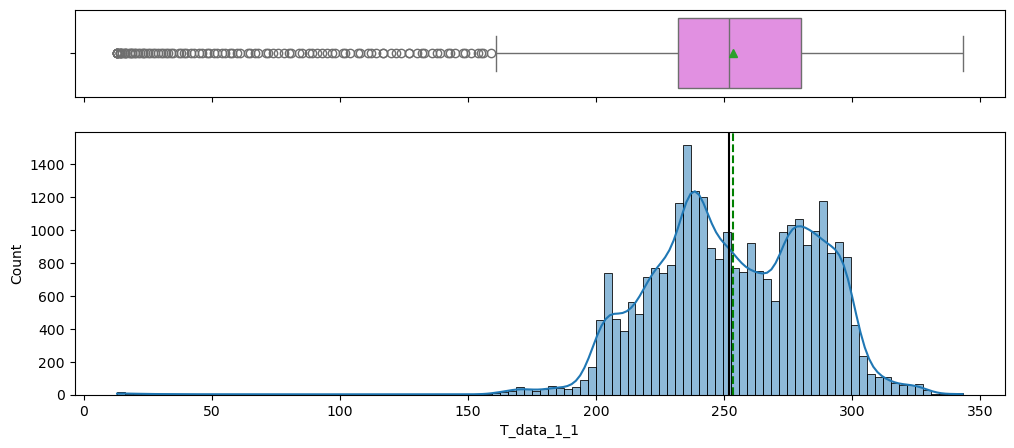

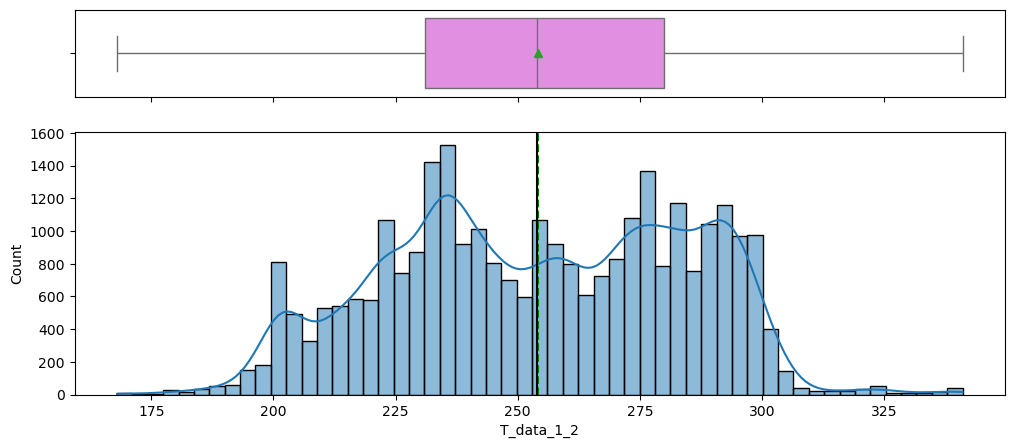

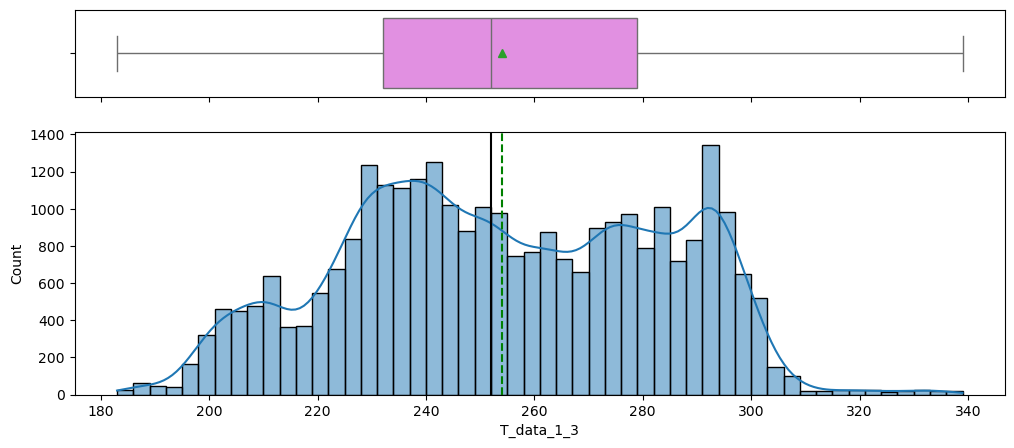

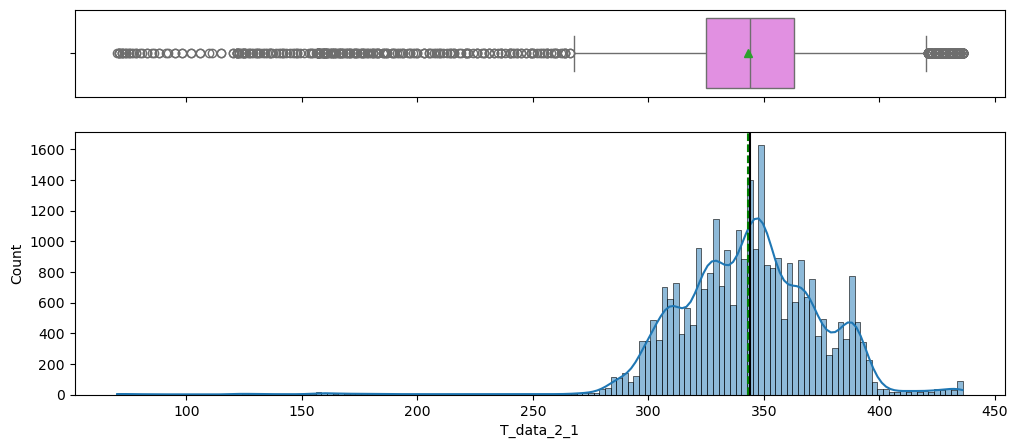

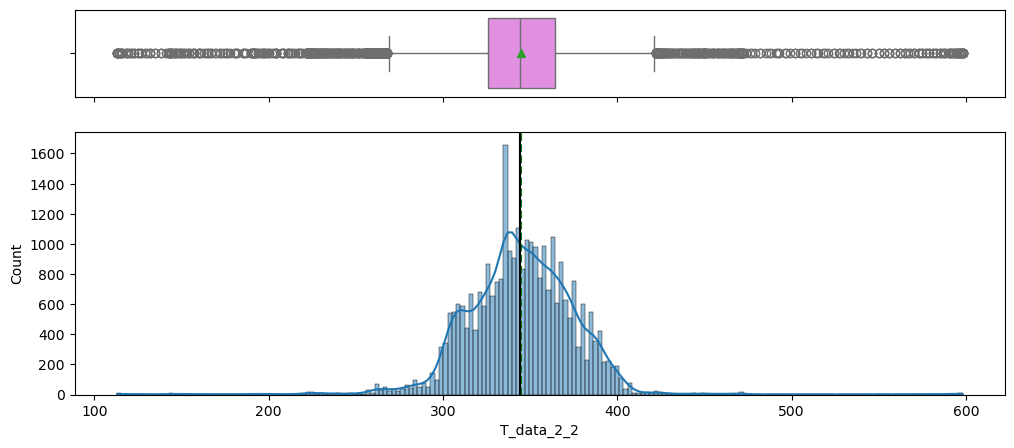

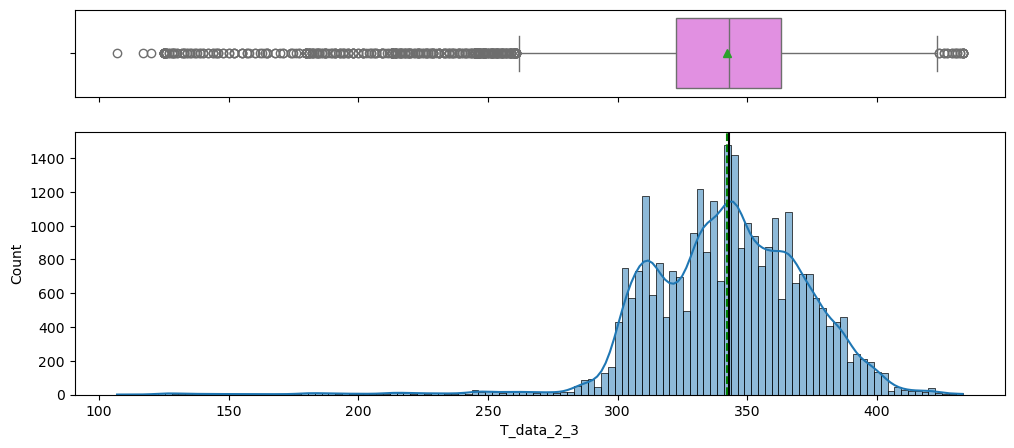

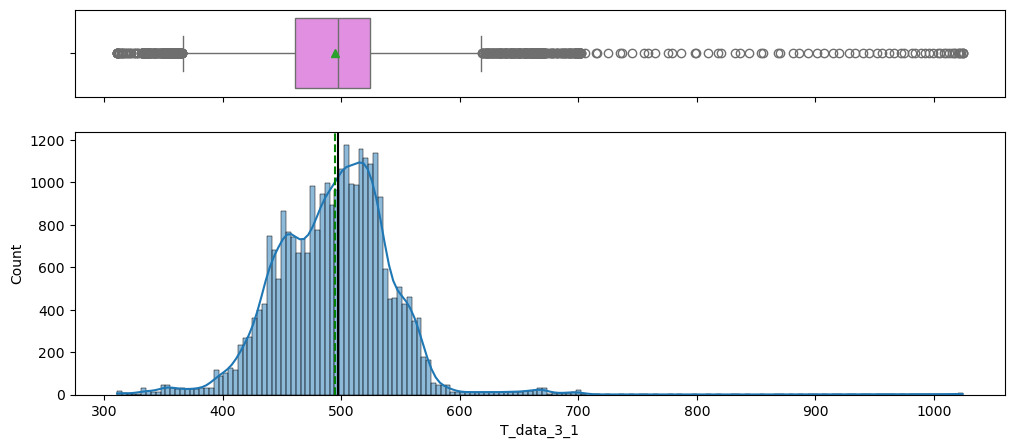

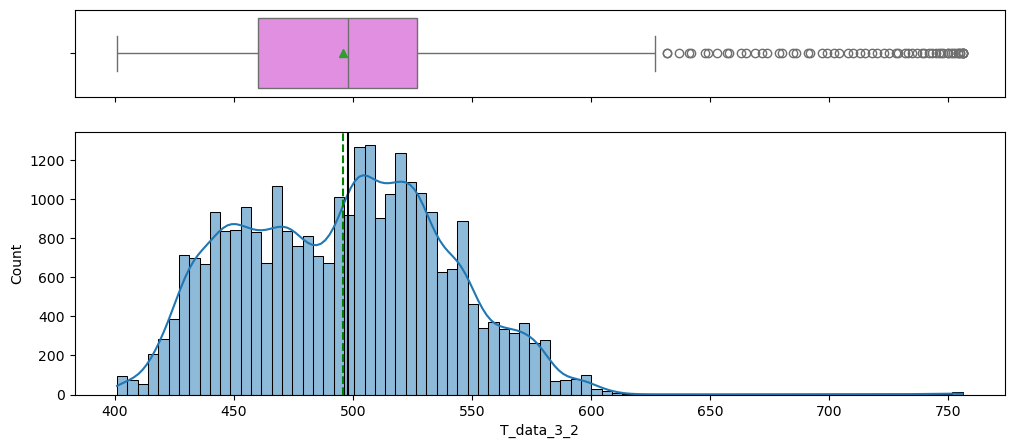

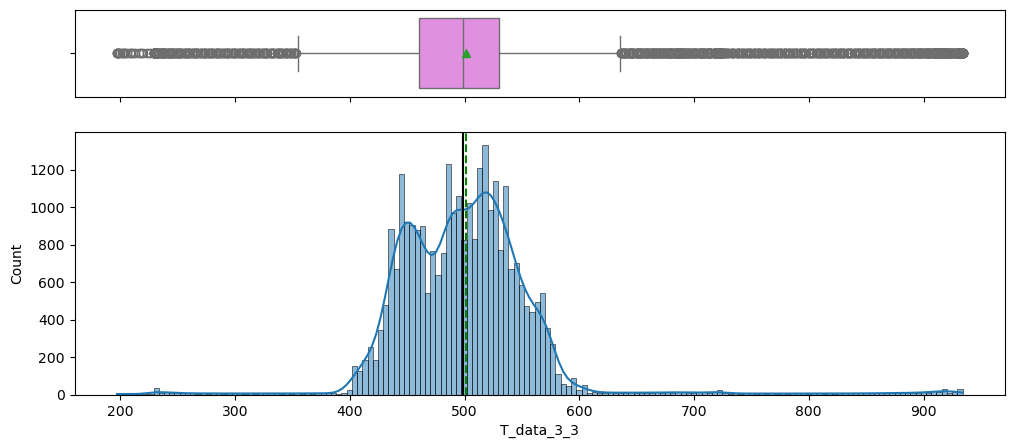

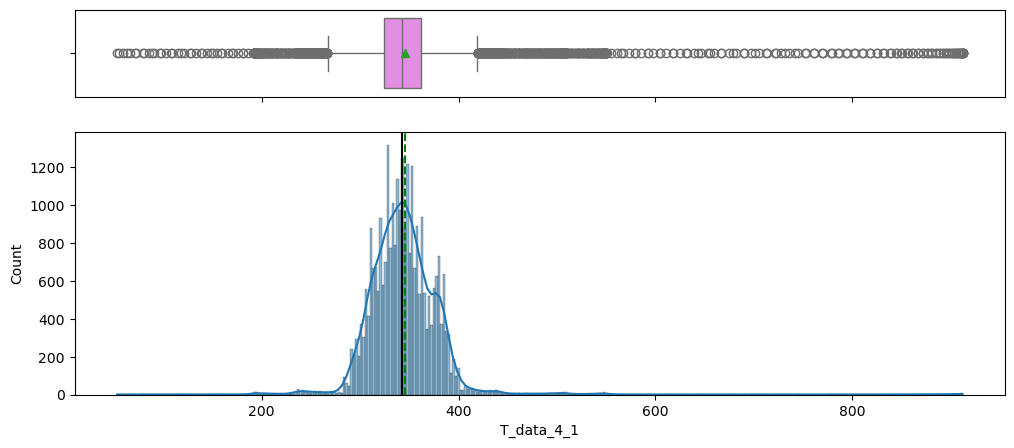

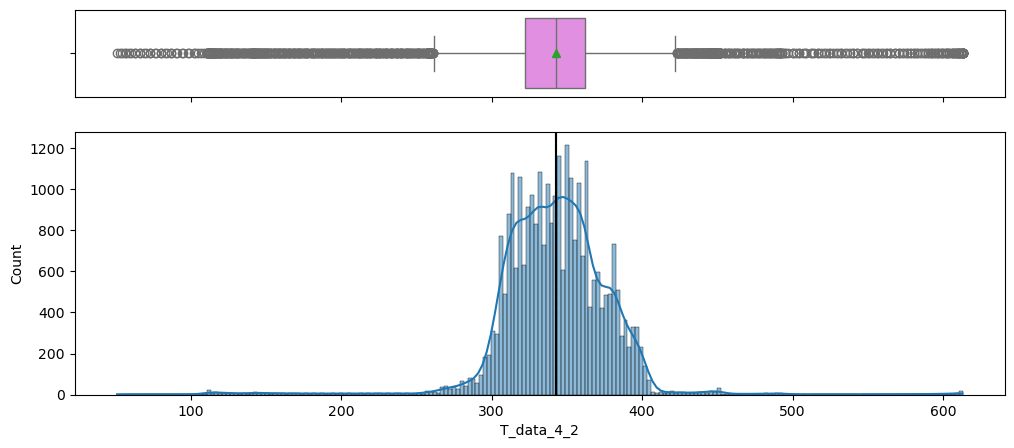

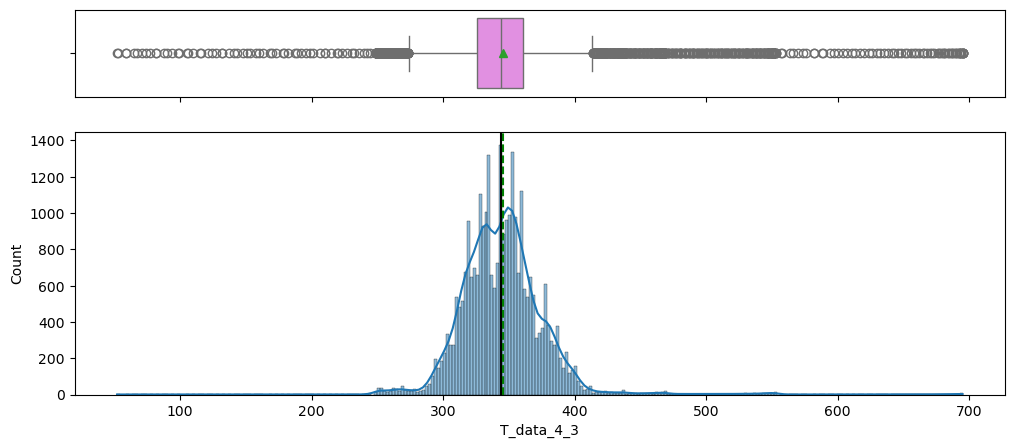

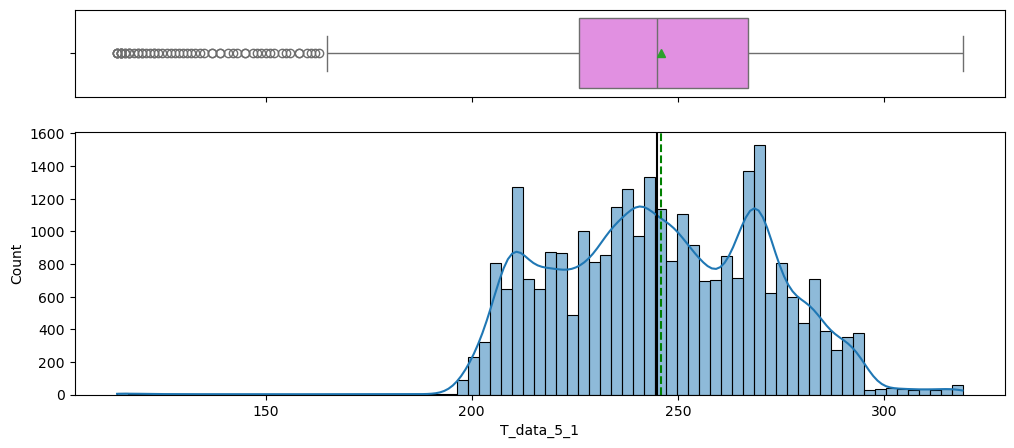

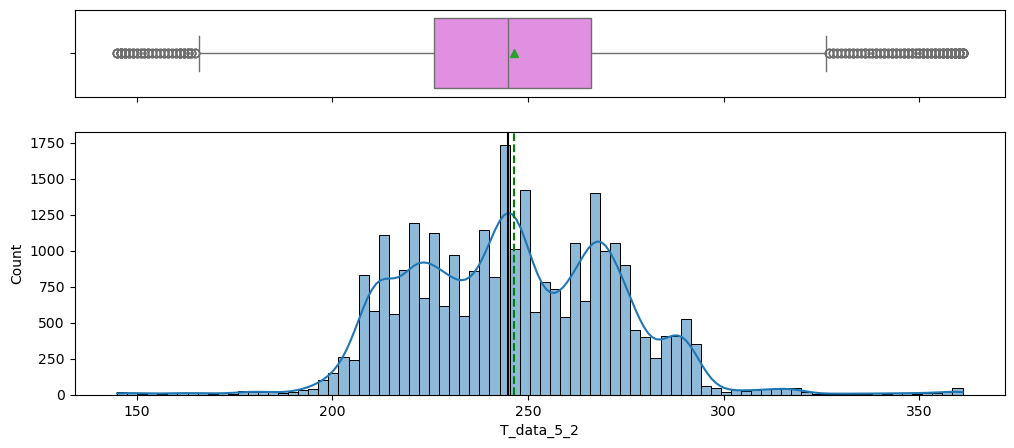

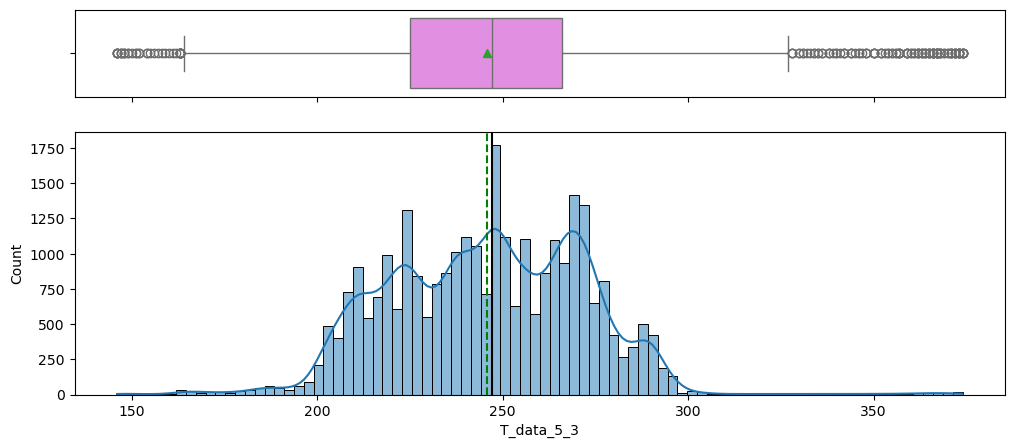

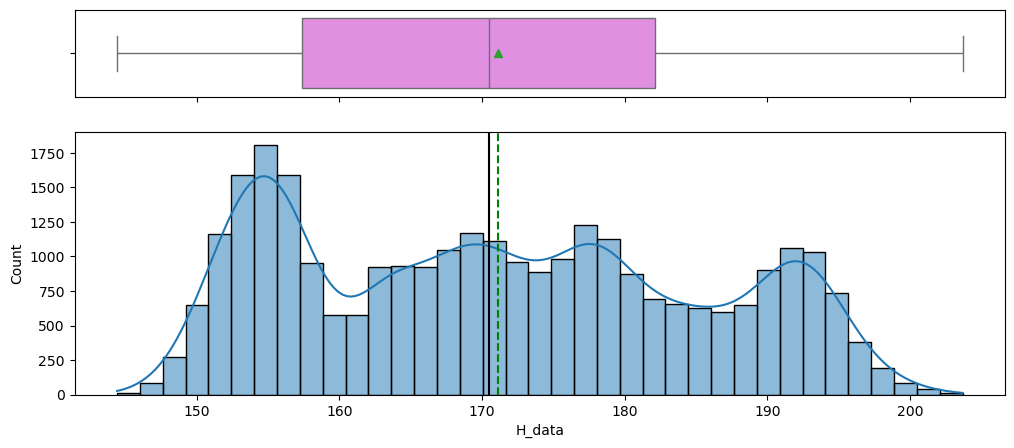

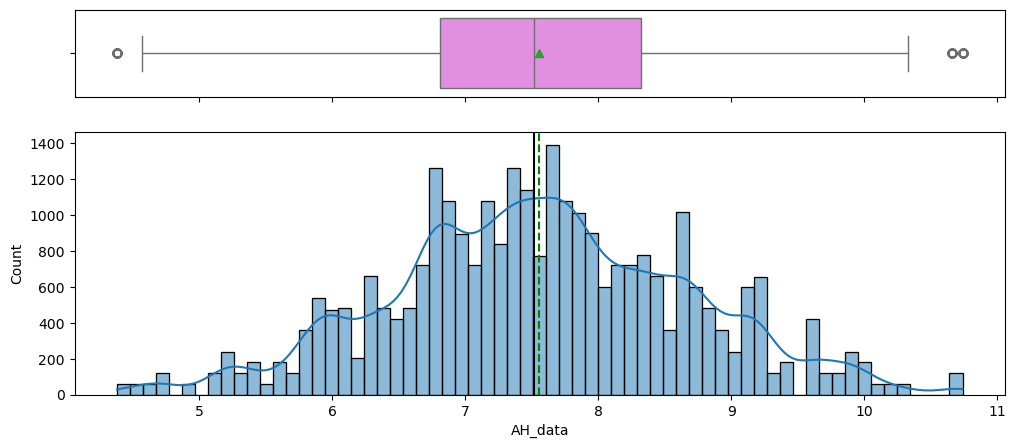

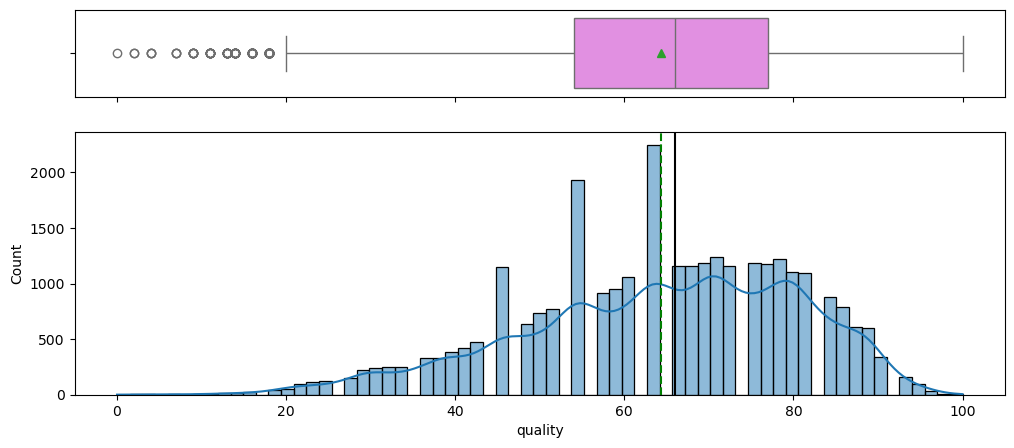

In [7]:
for column in kc_df.columns:
    f, (ax_box, ax_hist)= plt.subplots(nrows = 2, sharex=True, figsize=(12,5), gridspec_kw={'height_ratios':(0.25,0.75)})
    sns.boxplot(data = kc_df, x=column, ax=ax_box, showmeans=True, color= 'violet')
    sns.histplot(data=kc_df, x=column, ax=ax_hist, kde=True)
    ax_hist.axvline(kc_df[column].mean(), linestyle= '--', color='green')
    ax_hist.axvline(kc_df[column].median(), linestyle= '-', color='black')
    plt.show()

- **Chamber 1:**
1. *Sensor 1* is bimodal distribution and lot's of outlier on the left side(lower tempreture)
2. *Sensor 2* still bimodal but less noticable than sensor 1 and has no outlier. 
3. *Sensor 3* still bimodal but less noticable than sensor 1 and has no outlier. Sensor 2 and 3 has similar distirbution. 
4. since we don't see any of the outliers in the sensor 2 and 3 we are assuming that sensor 1 is doing a lot of miss reading. One solution is to eliminate this sensor all to gether. Another approch is to just cut the outliers in the data  and replace them by min reading in sensor 2 nad 3. 
<br>
- **Chamber 2:**
1. *Sensor 1* is almost normal distribution which is left skewed and lot's of outlier on the left side(lower tempreture)
2. *Sensor 2* is normal distribution with long tials on both sides. Lot's of outliers in left and right side.  
3. *Sensor 3* is approximately normal distribution that is slightly left skewed. Outliers in the left side. 
4. For this chamber the all 3 sensors has lot's of outliers so we will not change that seems to be legit but we notice that min record for sensor 1 is 70 and for sensor 2 and 3  are 107 and 113 so we will clip the data below 107 in sensor 1.
<br>
- **Chamber 3:**
1. *Sensor 1* is  approximately normal distribution which is right skewed and lot's of outlier on the right side(higher tempreture)
2. *Sensor 2* is approximately uniform distribution which is right skewed. Lot's of outliers in right side.  
3. *Sensor 3* is approximately bimodal distribution which has tails on both side.
4. For this chamber the tail on the higher temp. is observed in all three sensors so they seems to be legit. Although on the lower side it seems that for sensor one we go to min of ~300 for sensor 2 ~400 and for sensor 3 ~200. so it is all over the place. Therefore I am not going to modify that as well we almost similar values for two out of 3 I would modify that left out one. 
<br>
- **Chamber 4:**
1. *Sensor 1* is approximately normal distribution with tails on both side. Outliers on both side.
2. *Sensor 2* is approximately normal distribution with tails on both side. Outliers on both side.
3. *Sensor 3* is approximately normal distribution with tails on both side. Outliers on both side.
 <br>
- **Chamber 5:**
1. *Sensor 1* is left skewed data with lots of outliers on left side.
2. *Sensor 2* has many outliers on both side. 
3. *Sensor 3* is approximately normal distribution with tails on both side. Outliers on both side.
<br>
- **H_data** almost varies between 150 and 200. 
<br>
- **AH_data** is almost normal distribution and the has very few outliers. 
<br>
- **quality** is left skewed normal distibution with. 

<Axes: xlabel='T_data_1_1', ylabel='Count'>

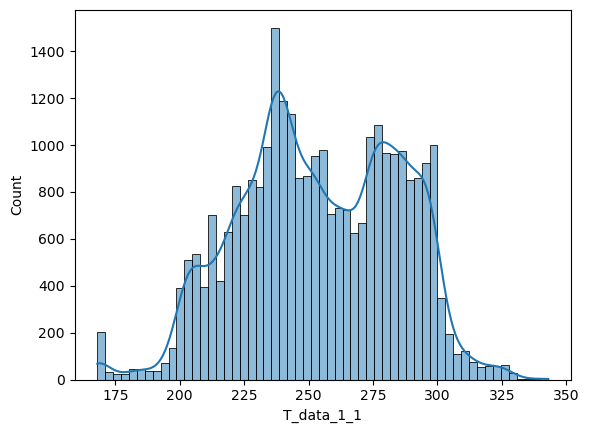

In [8]:
kc_df['T_data_1_1'].clip(lower=168, inplace=True)
sns.histplot(data=kc_df['T_data_1_1'], kde=True)

In [9]:
kc_df['T_data_2_1'].clip(lower=107, inplace=True)

#### **Bivariant Analysis**

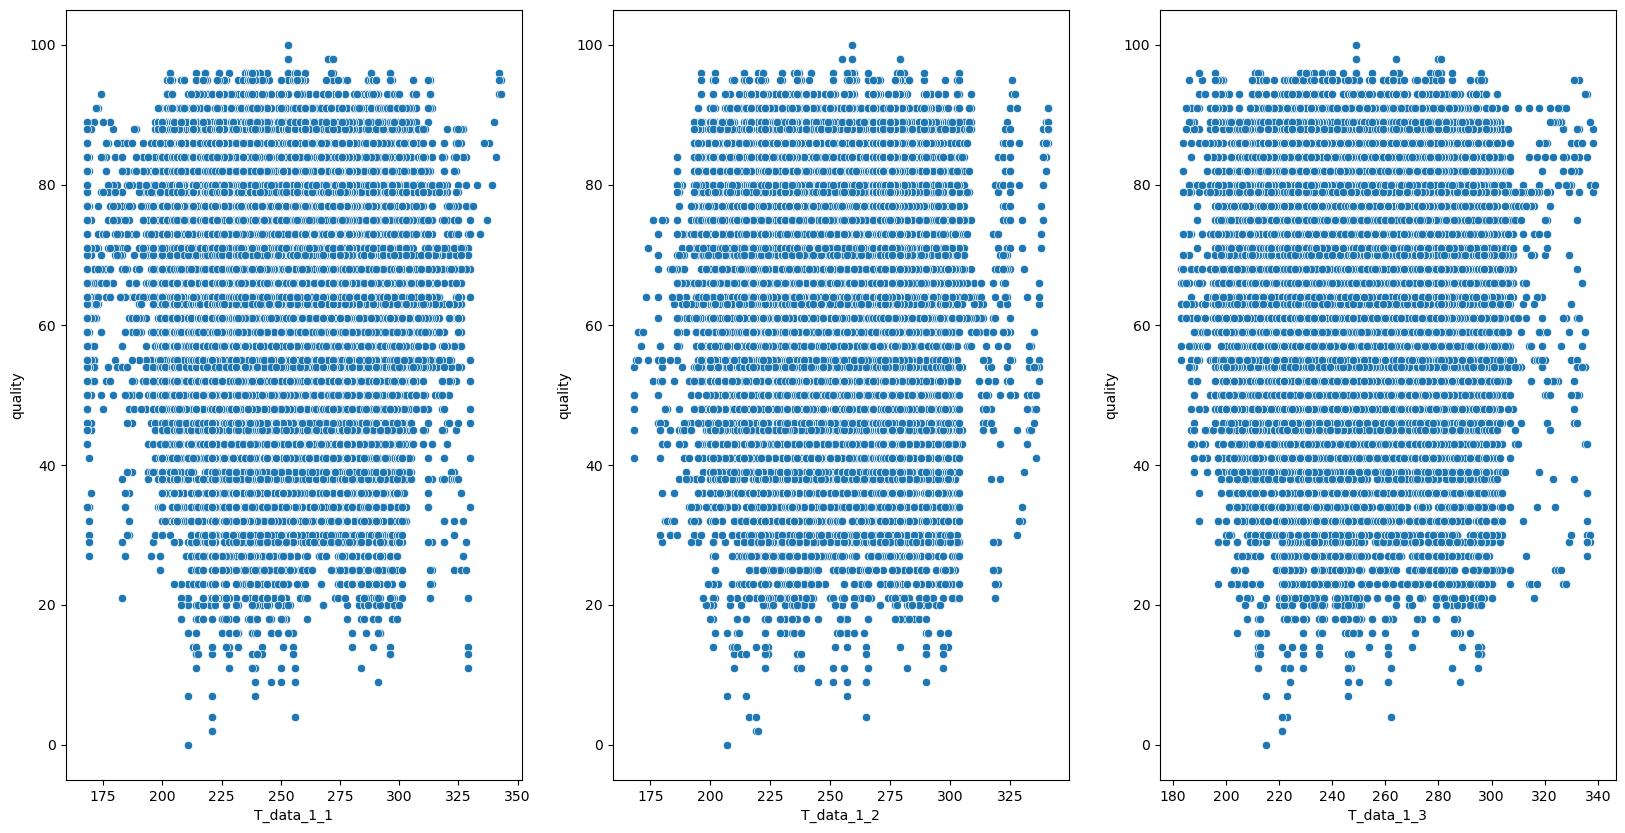

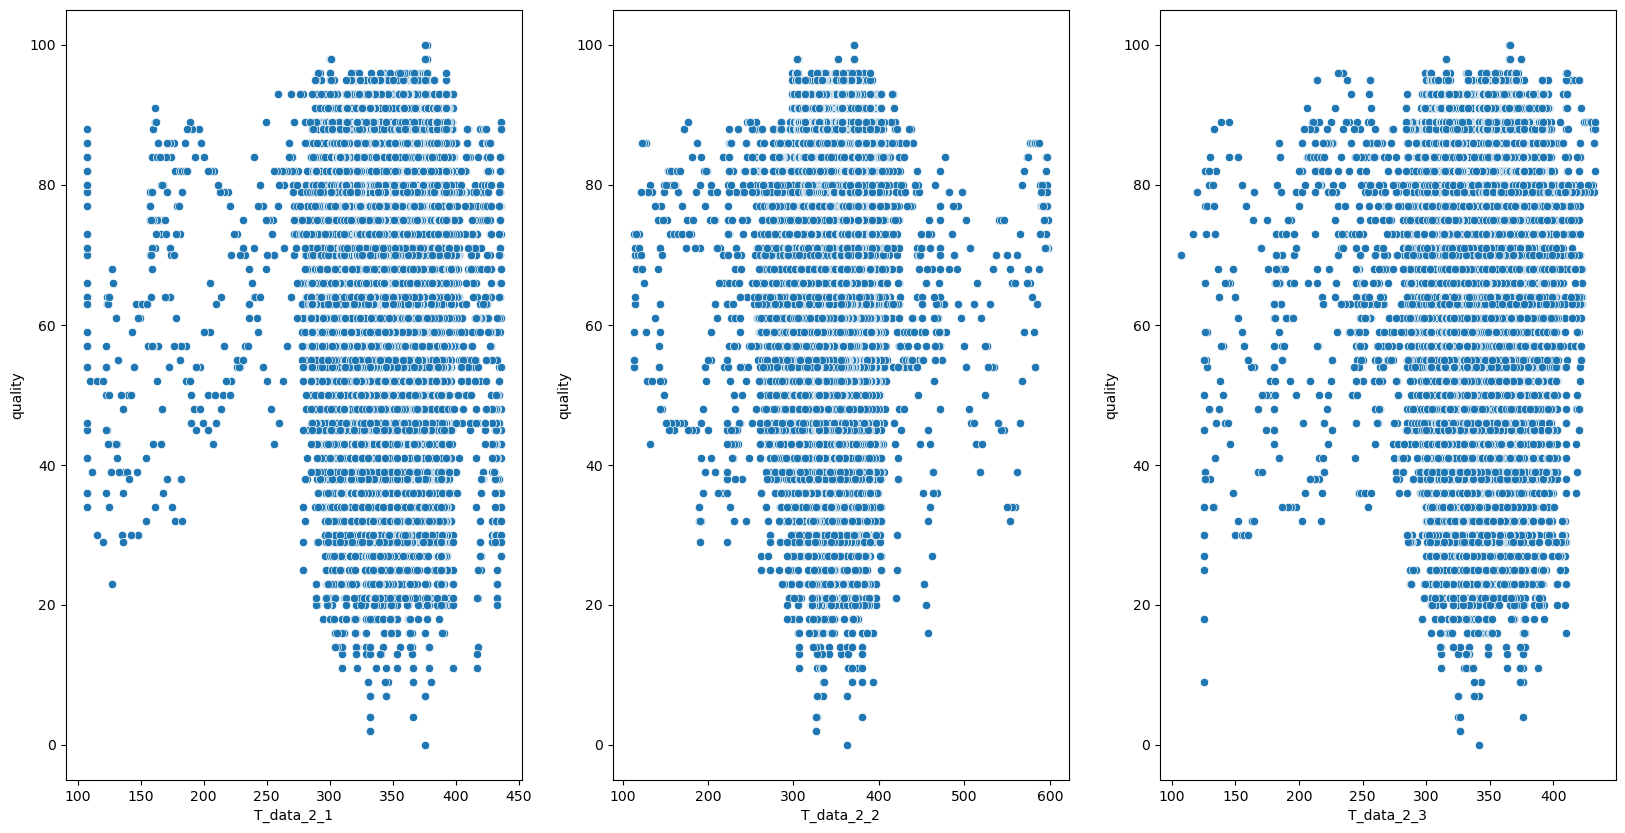

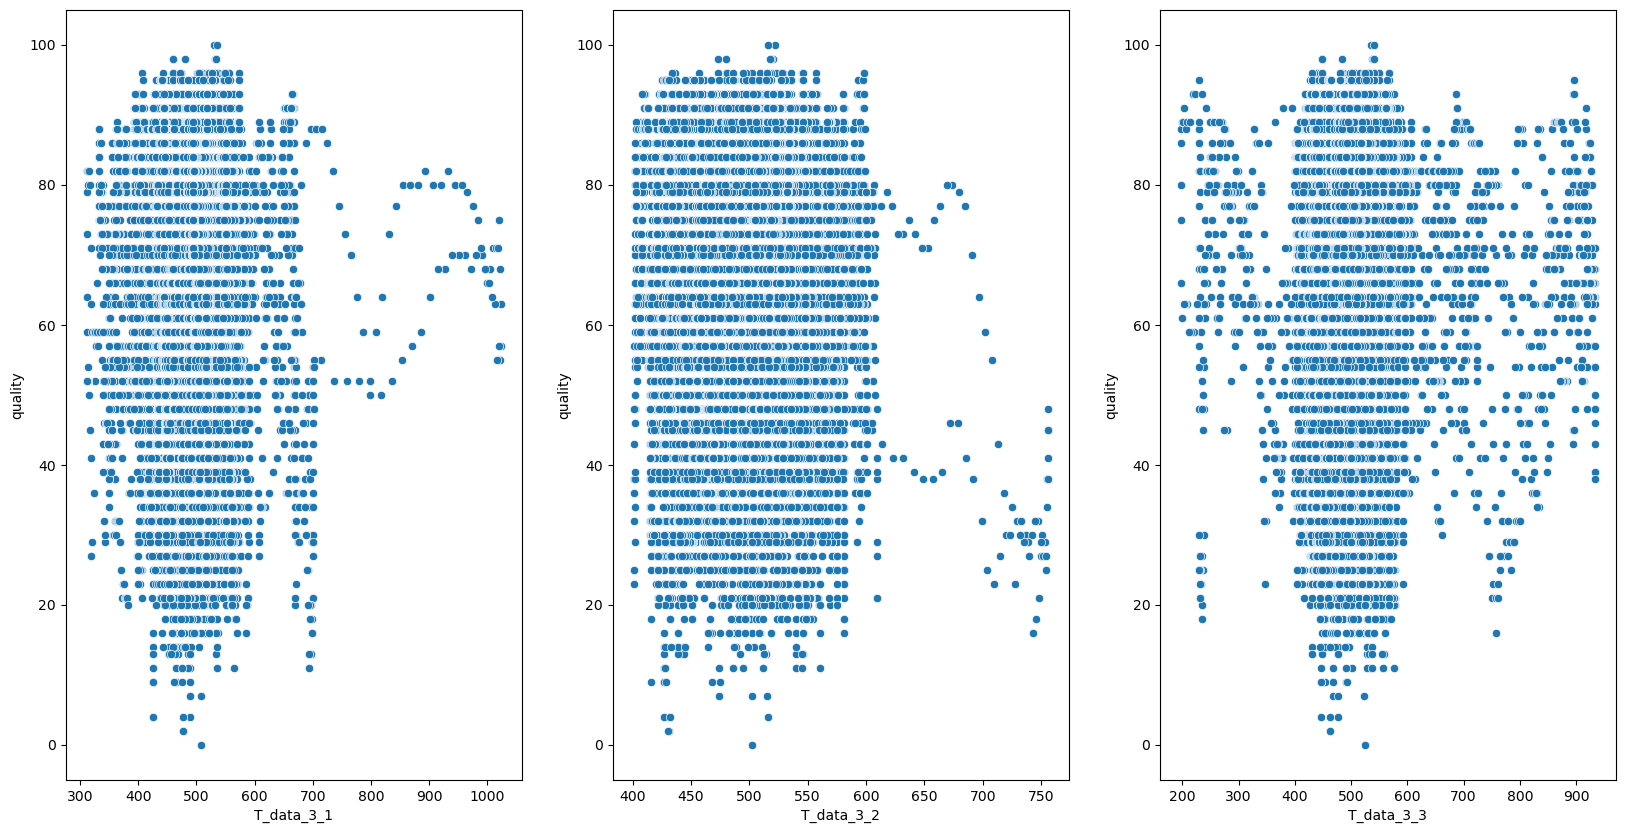

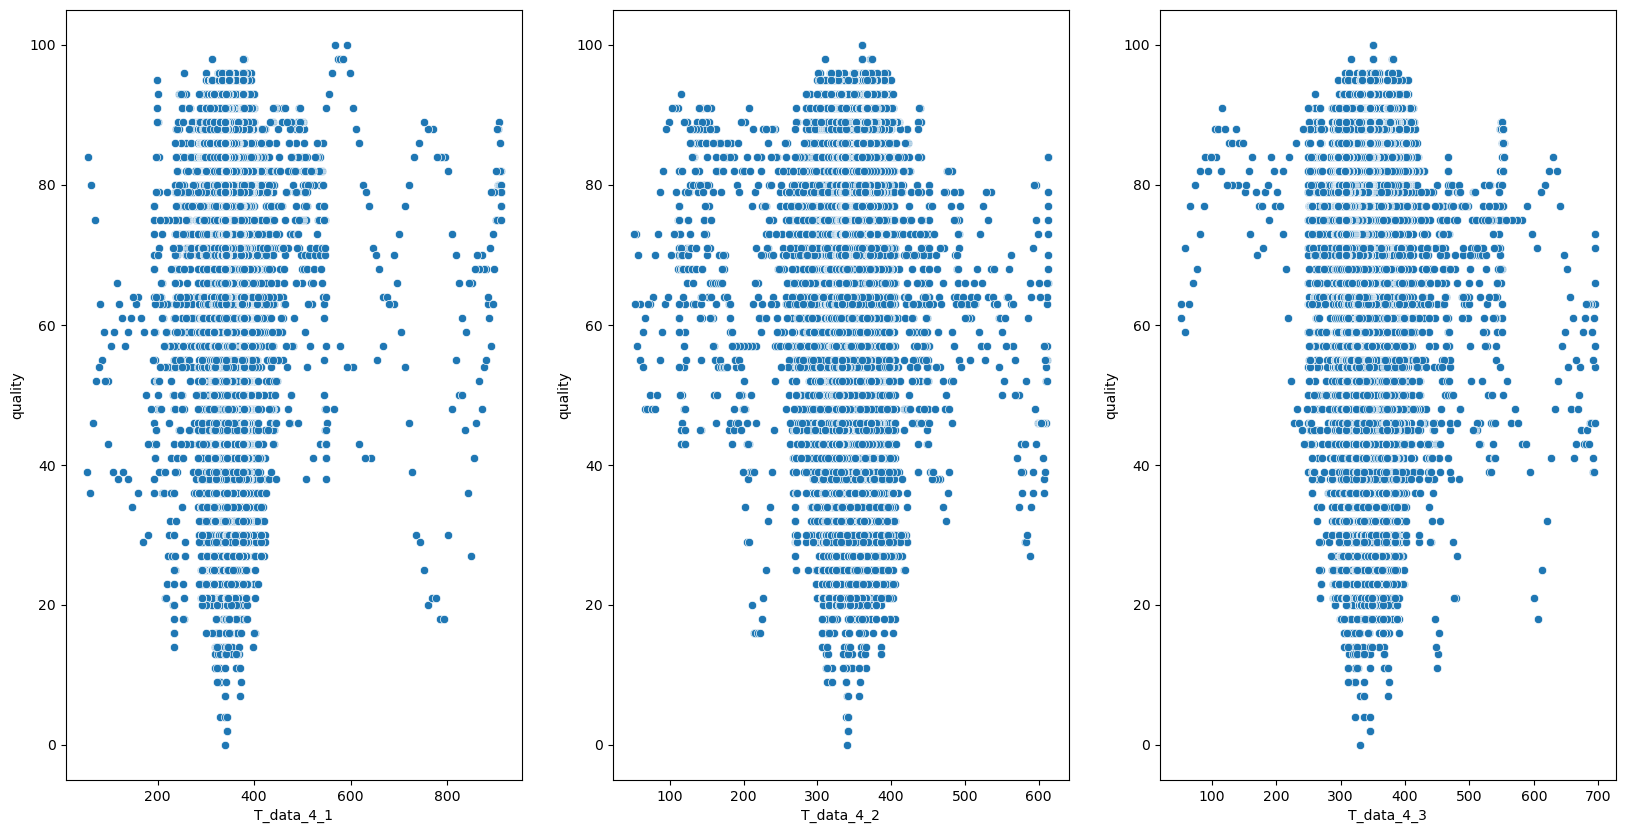

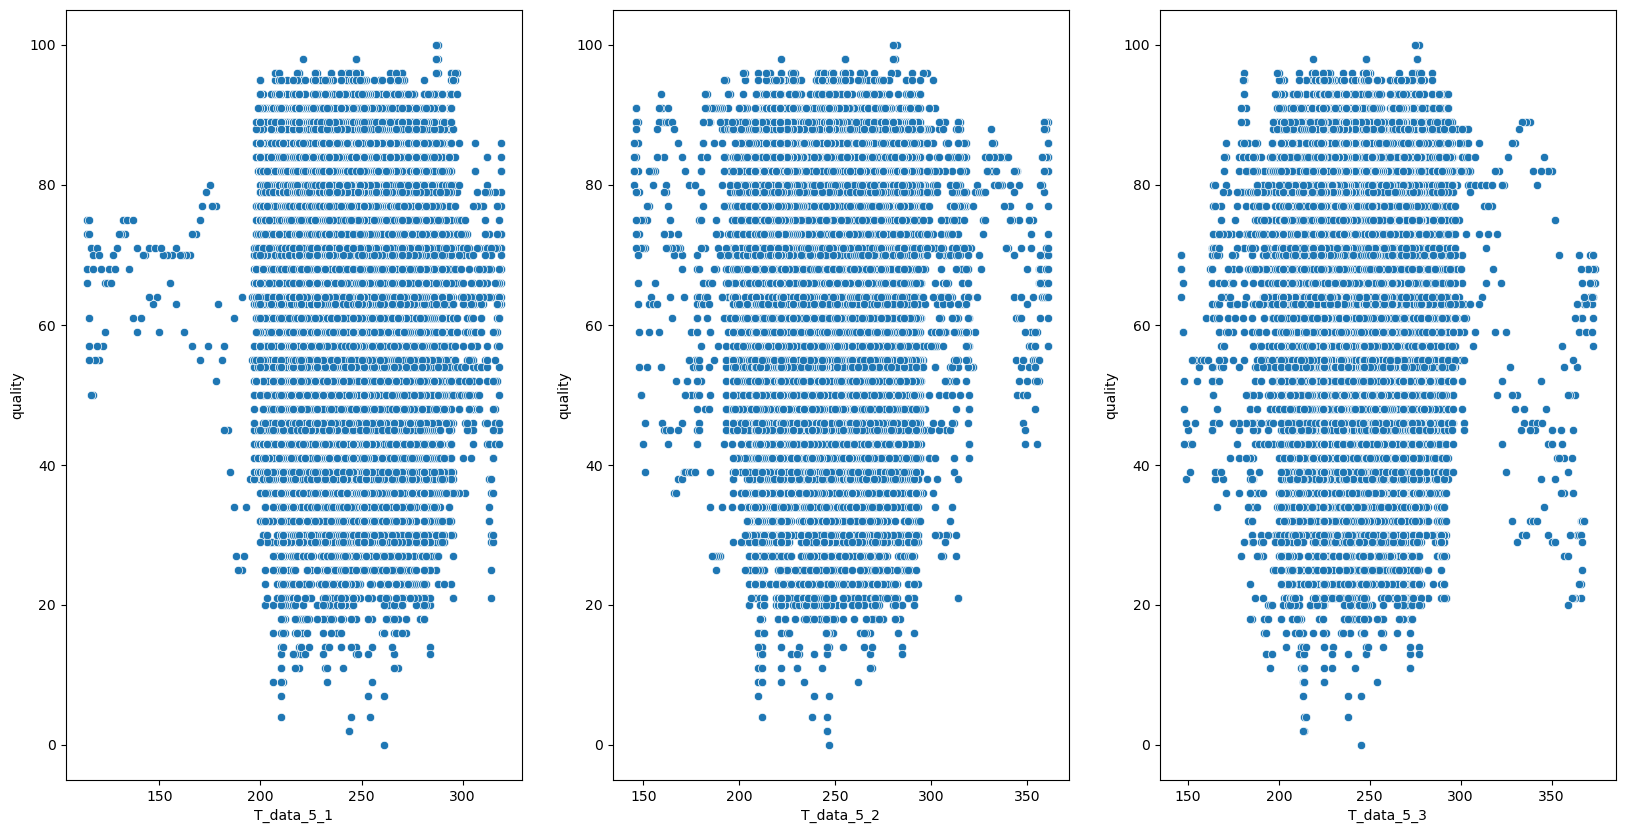

In [10]:
for i in range(1, 6, 1): 
    plt.figure(figsize=(20,10))
    for j in range(1,4,1):
        ax = plt.subplot(1, 3, j)
        feature = f'T_data_{str(i)}_{str(j)}'
        sns.scatterplot(data=kc_df, y='quality', x=feature)

- Temp. of chamber 1 variaes between 150 to 300 and deosn't seem to effect the quality that much. 
- Temp. of chamber 2  variaes between 250 to 400 and deosn't seem to effect the quality that much. 
- Temp. of chamber 3  variaes between 400 to 600 and deosn't seem to effect the quality that much.
- Temp. of chamber 4  variaes between 200 to 450 and it seems beans roasted in this temperature range have a better quality. 
- Temp. of chamber 5  variaes between 200 to 300 and deosn't seem to effect the quality that much.

<Axes: xlabel='quality', ylabel='H_data'>

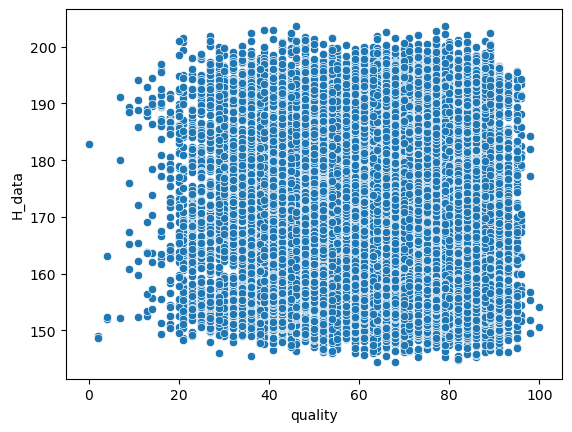

In [11]:
sns.scatterplot(data=kc_df, x='quality', y='H_data')

<Axes: xlabel='quality', ylabel='AH_data'>

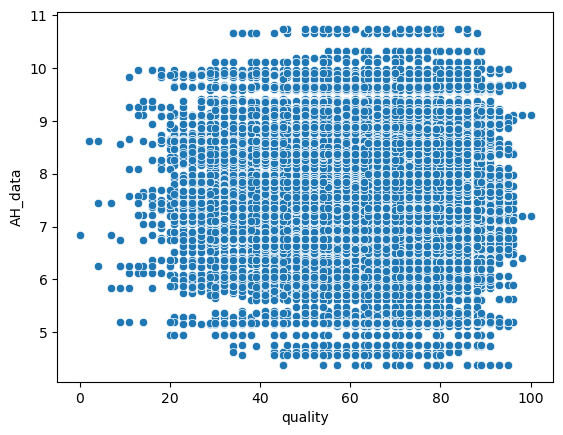

In [12]:
sns.scatterplot(data=kc_df, x='quality', y='AH_data')

- The H_data is around 150 to 200 and no clear correlation between the volume and the quality of the beans. 
- The AH_data is varying aroung 5 to 10 and it doesn't seem to effect the quality that much no clear correlation is observed here.

<Axes: >

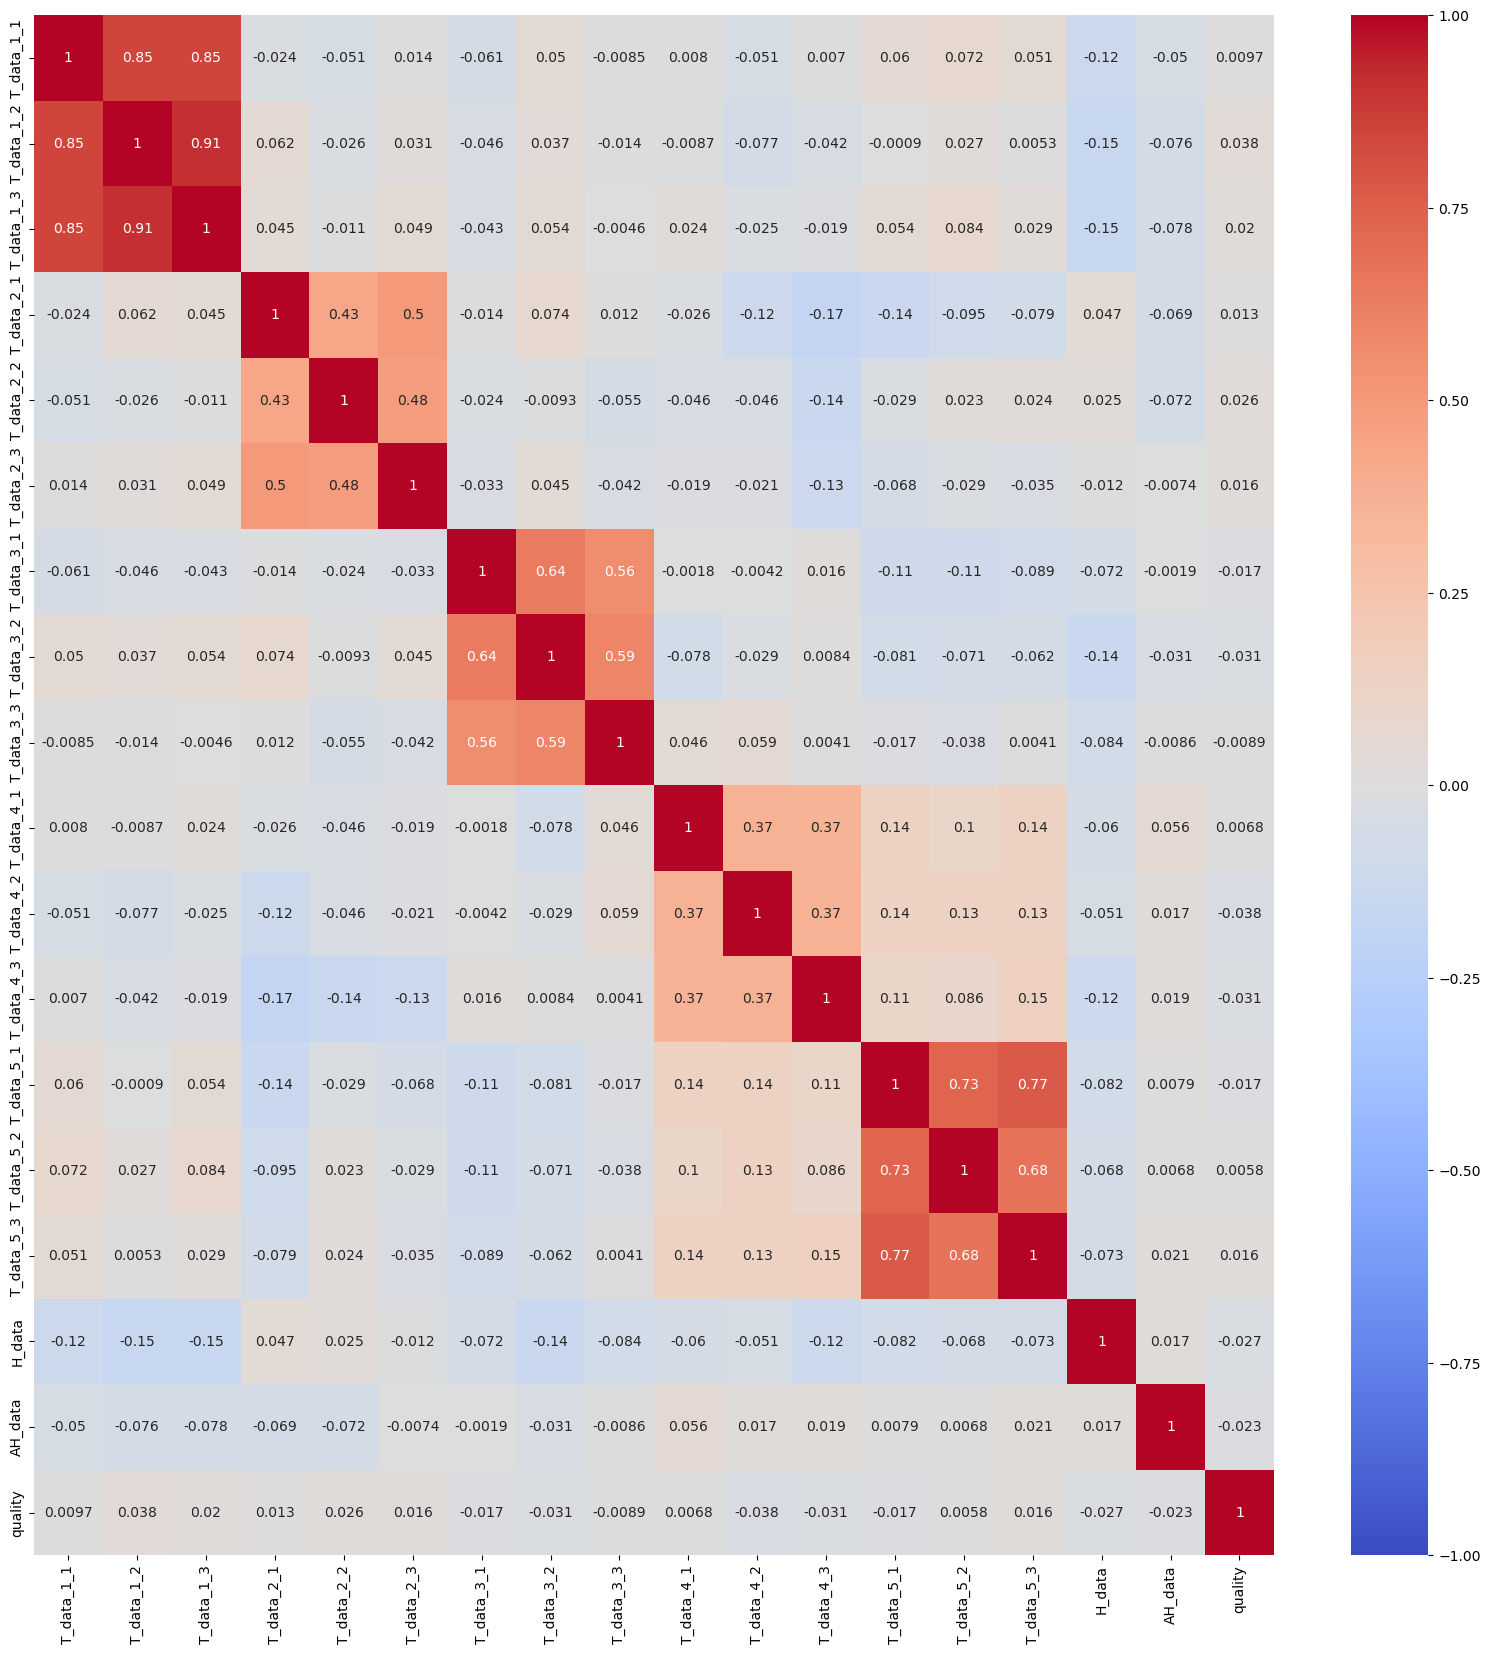

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data=kc_df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

- Temperature for each chamber obtained by different sensor are highly correlating with each other which makes sense.
- Not a signle variable impact quality dramatically. 
- H_data and AH-data has negative correlation with quality.

## **Preprocessing Data**

In [14]:
X = kc_df.drop(['quality'], axis=1)
Y= kc_df['quality']

In [15]:
# Test and training split
x_temp, x_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# training and validation split
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=1)

print(f'Training data shape:{x_train.shape}')
print(f'Validation data shape:{x_val.shape}')
print(f'Test data shape:{x_test.shape}')

Training data shape:(17478, 17)
Validation data shape:(5826, 17)
Test data shape:(5827, 17)


#### **Missing_values**

- To avoid data Leakage we will deal with missing data after splitting

In [16]:
imputer =SimpleImputer(strategy='median')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns)
x_val = pd.DataFrame(imputer.fit_transform(x_val), columns=x_val.columns)
x_train.isnull().sum()

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64

Note that for random forest and decision tree we don't need to scale the data but for other algorithm better to scale the data. 

## **Builiding Model**

In [17]:
def adjuested_r2(predictor, target, prediction):
    r2 = r2_score(target, prediction)
    n = predictor.shape[0]
    k = predictor.shape[1]
    return 1 - ((1-r2)*(n-1)/(n-k-1))

def performance_mertric(model, predictor, target):
    pred = model.predict(predictor)
    r2 = r2_score(target, pred)
    adj_r2 =adjuested_r2(predictor, target, pred)
    mape = mean_absolute_percentage_error(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)

    df_pref = pd.DataFrame({
        'MAPE': mae, 
        'RMSE': rmse,
        'MAE': mae,
        'R-Squared': r2, 
        'Adj.R-Squared': adj_r2
    }, index=[0])
    return df_pref

#### **Decision Tree**

In [19]:
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train, y_train)
dt_pref = performance_mertric(dt_model, x_train, y_train)
dt_pref

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,0.0,0.0,0.0,1.0,1.0


In [26]:
print('Decision Tree preformance on validation data:')
dt_pref_val = performance_mertric(dt_model, x_val, y_val)
dt_pref_val

Decision Tree preformance on validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,5.356849,7.724809,5.356849,0.776626,0.775972


- The performance of decision tree is dropping drastically on the test data which is indication of overfitting the data. 

#### **Random Forest**

In [22]:
rf_model =RandomForestRegressor(random_state=1)
rf_model.fit(x_train, y_train)
rf_pref = performance_mertric(rf_model, x_train, y_train)
rf_pref

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,1.489916,2.02117,1.489916,0.984895,0.984881


In [32]:
print('Random Forest preformance on Validation data:')
rf_pref_val = performance_mertric(rf_model, x_val, y_val    )
rf_pref_val

Random Forest preformance on Validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,4.044806,5.43006,4.044806,0.889626,0.889303


- Random Forest model is slightly overfitting here. 

#### **Bagging Regressor**

In [24]:
bg_model =BaggingRegressor(random_state=1)
bg_model.fit(x_train, y_train)
bg_pref = performance_mertric(bg_model, x_train, y_train)
bg_pref

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,1.804034,2.619485,1.804034,0.974629,0.974604


In [39]:
print('Bagging preformance on Validation data:')
bg_pref_val = performance_mertric(bg_model, x_val, y_val)
bg_pref_val

Bagging preformance on Validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,4.457501,6.027381,4.457501,0.864008,0.863609


The bagging regression is also dealing with over fitting problem. 

#### **Adaboost Regressor**

In [29]:
adaboost_model =AdaBoostRegressor(random_state=1)
adaboost_model.fit(x_train, y_train)
adb_pref = performance_mertric(adaboost_model, x_train, y_train)
adb_pref

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,13.744628,16.442535,13.744628,0.000368,-0.000605


In [38]:
print('Adaboost preformance on Validation data:')
adb_pref_val = performance_mertric(adaboost_model, x_val, y_val)
adb_pref_val

Adaboost preformance on Validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,13.722805,16.458393,13.722805,-0.013987,-0.016955


- Adaboost does a poor job in modeling this dataset. 

#### **Gradient Boosting Regressor**

In [33]:
gboost_model =GradientBoostingRegressor(random_state=1)
gboost_model.fit(x_train, y_train)
gb_pref = performance_mertric(gboost_model, x_train, y_train)
gb_pref

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,12.141144,14.875752,12.141144,0.181798,0.181002


In [37]:
print('Gradient Boosting preformance on Validation data:')
gb_pref_val = performance_mertric(gboost_model, x_val, y_val)
gb_pref_val

Gradient Boosting preformance on Validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,12.157745,15.029195,12.157745,0.15447,0.151995


- The error is very high in both test and training data. The Gradient boosting doesn't perform well in here. 

#### **XGBoost regressor**

In [35]:
xgb_model =XGBRegressor(random_state=1)
xgb_model.fit(x_train, y_train)
xgb_pref = performance_mertric(xgb_model, x_train, y_train)
xgb_pref

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,5.946447,7.578697,5.946447,0.787631,0.787424


In [36]:
print('XGBoost preformance on Validation data:')
xgb_pref_val = performance_mertric(xgb_model, x_val, y_val)
xgb_pref_val

XGBoost preformance on Validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,7.28184,9.290925,7.28184,0.676871,0.675926


The model is not performing well here. 

#### **Model Performance Comparison**

In [40]:
compare_trainig_df = pd.concat(
    [dt_pref.T,
     rf_pref.T,
     bg_pref.T,
     adb_pref.T,
     gb_pref.T,
     xgb_pref.T],
     axis=1
)
compare_trainig_df.columns = [
    'Decission Tree',
    'Random Forest',
    'Bagging Regressor',
    'Adaboost',
    'Gradient Boosting',
    'XGBoost'
]

print('Training Data perofrmance: ')
compare_trainig_df

Training Data perofrmance: 


,Decission Tree,Random Forest,Bagging Regressor,Adaboost,Gradient Boosting,XGBoost
MAPE,0.0,1.489916,1.804034,13.744628,12.141144,5.946447
RMSE,0.0,2.021170,2.619485,16.442535,14.875752,7.578697
MAE,0.0,1.489916,1.804034,13.744628,12.141144,5.946447
R-Squared,1.0,0.984895,0.974629,0.000368,0.181798,0.787631
Adj.R-Squared,1.0,0.984881,0.974604,-0.000605,0.181002,0.787424


In [61]:
compare_validation_df = pd.concat(
    [dt_pref_val.T,
     rf_pref_val.T,
     bg_pref_val.T,
     adb_pref_val.T,
     gb_pref_val.T,
     xgb_pref_val.T],
     axis=1
)
compare_validation_df.columns = [
    'Decission Tree',
    'Random Forest',
    'Bagging Regressor',
    'Adaboost',
    'Gradient Boosting',
    'XGBoost'
]

print('Validation Data perofrmance: ')
compare_validation_df

Validation Data perofrmance: 


,Decission Tree,Random Forest,Bagging Regressor,Adaboost,Gradient Boosting,XGBoost
MAPE,5.356849,4.044806,4.457501,13.722805,12.157745,7.281840
RMSE,7.724809,5.430060,6.027381,16.458393,15.029195,9.290925
MAE,5.356849,4.044806,4.457501,13.722805,12.157745,7.281840
R-Squared,0.776626,0.889626,0.864008,-0.013987,0.154470,0.676871
Adj.R-Squared,0.775972,0.889303,0.863609,-0.016955,0.151995,0.675926


The best models here are: Decision Tree, Random Forest, and Bagging. We will hyperparameter tunning for both of them. 

## **Hyperparameter Tuning**

#### **Tuning Decision Tree model**

In [44]:
dt_tuned =DecisionTreeRegressor(random_state=1)
parameters_dt = {'max_depth': list(np.arange(15,20)) + [None], 
                 'min_samples_leaf': [1, 3, None], 
                 'max_leaf_nodes': [5, 10, 15, None],
                 'min_impurity_decrease': [0.001, 0.0]
}

score= make_scorer(r2_score)

tune_dt = RandomizedSearchCV(dt_tuned, parameters_dt, scoring=score, cv=5, n_jobs=-1, verbose=2, n_iter=100)
tune_dt.fit(x_train, y_train)

print(f'best parameters for decision tree is {tune_dt.best_params_} with score of {tune_dt.best_score_}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
best parameters for decision tree is {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_depth': None} with score of 0.7369623288795376


In [45]:
dt_tune_model = DecisionTreeRegressor(
    random_state=1, max_depth= None, max_leaf_nodes=None, min_samples_leaf=1, min_impurity_decrease=0.001
)
dt_tune_model.fit(x_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, random_state=1)

In [46]:
dt_pref_tuned = performance_mertric(dt_tune_model, x_train, y_train)
dt_pref_tuned

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,1.10983,1.502013,1.10983,0.991658,0.99165


In [47]:
print('Decision Tree preformance on validation data:')
dt_tuned_pref_val = performance_mertric(dt_tune_model, x_val, y_val)
dt_tuned_pref_val

Decision Tree preformance on validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,5.48896,7.763761,5.48896,0.774367,0.773707


The model is still overfitting the data and doesn't work well on the generalized model. 

#### **Tuning Random Forest model**

In [49]:
rf_tuned =RandomForestRegressor(random_state=1)
parameters_rf = {'max_depth': [4, 6,8,10, None], 
                 'max_features': ['sqrt', 'log2', None], 
                 'n_estimators': [80, 90, 100, 110, 120],
}

score= make_scorer(r2_score)

tune_rf = RandomizedSearchCV(rf_tuned, parameters_rf, scoring=score, cv=5, n_jobs=-1, n_iter=40, random_state=1)
tune_rf.fit(x_train, y_train)

print(f'best parameters for decision tree is {tune_rf.best_params_} with score of {tune_rf.best_score_}')

best parameters for decision tree is {'n_estimators': 110, 'max_features': 'log2', 'max_depth': None} with score of 0.8728241173792662


In [50]:
rf_tune_model = RandomForestRegressor(
    random_state=1, max_depth= None, max_features='log2', n_estimators=110
)
rf_tune_model.fit(x_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=110, random_state=1)

In [51]:
rf_pref_tuned = performance_mertric(rf_tune_model, x_train, y_train)
rf_pref_tuned

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,1.416993,1.924993,1.416993,0.986299,0.986285


In [52]:
print('Tuned Random Forest preformance on validation data:')
rf_tuned_pref_val = performance_mertric(rf_tune_model, x_val, y_val)
rf_tuned_pref_val

Tuned Random Forest preformance on validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,3.832628,5.153301,3.832628,0.90059,0.900299


The model performance improved after hyperparameter tuning and it is better than before. 

#### **Tuning Bagging Regressor**

In [53]:
bag_tuned =BaggingRegressor(random_state=1)
parameters_bag = {'max_samples': [0.7, 0.8, 0.9, 1], 
                 'max_features': [0.7, 0.8, 0.9, 1], 
                 'n_estimators': [50, 100, 120, 150],
}

score= make_scorer(r2_score)

tune_bag = RandomizedSearchCV(bag_tuned, parameters_bag, scoring=score, cv=5, n_jobs=-1, n_iter=20, random_state=1)
tune_bag.fit(x_train, y_train)

print(f'best parameters for decision tree is {tune_bag.best_params_} with score of {tune_bag.best_score_}')

best parameters for decision tree is {'n_estimators': 150, 'max_samples': 0.9, 'max_features': 0.8} with score of 0.8589855418237862


In [54]:
bag_tune_model = BaggingRegressor(
    random_state=1, max_samples= 0.9, max_features=0.8, n_estimators=150
)
bag_tune_model.fit(x_train, y_train)

BaggingRegressor(max_features=0.8, max_samples=0.9, n_estimators=150,
                 random_state=1)

In [55]:
bag_pref_tuned = performance_mertric(bag_tune_model, x_train, y_train)
bag_pref_tuned

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,1.659963,2.228596,1.659963,0.981636,0.981618


In [56]:
print('Tuned Random Forest preformance on validation data:')
bag_tuned_pref_val = performance_mertric(bag_tune_model, x_val, y_val)
bag_tuned_pref_val

Tuned Random Forest preformance on validation data:


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,4.088937,5.449774,4.088937,0.888823,0.888498


Bagging algorithm also improved with hyperparameter tunning but overall it is slightly overfitting. 

#### **Model performance comparison**

In [60]:
compare_trainig_df_tune = pd.concat(
    [dt_pref_tuned.T,
     rf_pref_tuned.T,
     bag_pref_tuned.T],
     axis=1
)
compare_trainig_df_tune.columns = [
    'Tuned Decission Tree',
    'Tuned Random Forest',
    'Tuned Bagging Regressor',

]

print('Training Data perofrmance: ')
compare_trainig_df_tune.T

Training Data perofrmance: 


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
Tuned Decission Tree,1.109830,1.502013,1.109830,0.991658,0.991650
Tuned Random Forest,1.416993,1.924993,1.416993,0.986299,0.986285
Tuned Bagging Regressor,1.659963,2.228596,1.659963,0.981636,0.981618


In [62]:
compare_validation_df_tune = pd.concat(
    [dt_tuned_pref_val.T,
     rf_tuned_pref_val.T,
     bag_tuned_pref_val.T],
     axis=1
)
compare_validation_df_tune.columns = [
    'Tuned Decission Tree',
    'Tuned Random Forest',
    'Tuned Bagging Regressor',

]

print('Validation Data perofrmance: ')
compare_validation_df_tune.T

Validation Data perofrmance: 


,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
Tuned Decission Tree,5.488960,7.763761,5.488960,0.774367,0.773707
Tuned Random Forest,3.832628,5.153301,3.832628,0.900590,0.900299
Tuned Bagging Regressor,4.088937,5.449774,4.088937,0.888823,0.888498


Random Forset seems to be the best model both in the training and test data. We will continue with this model. 


In [63]:
rf_test_perf = performance_mertric(rf_tune_model, x_test, y_test)
rf_test_perf

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,3.752605,4.970277,3.752605,0.907024,0.906752


The performance of random forset on the test data is also good. 

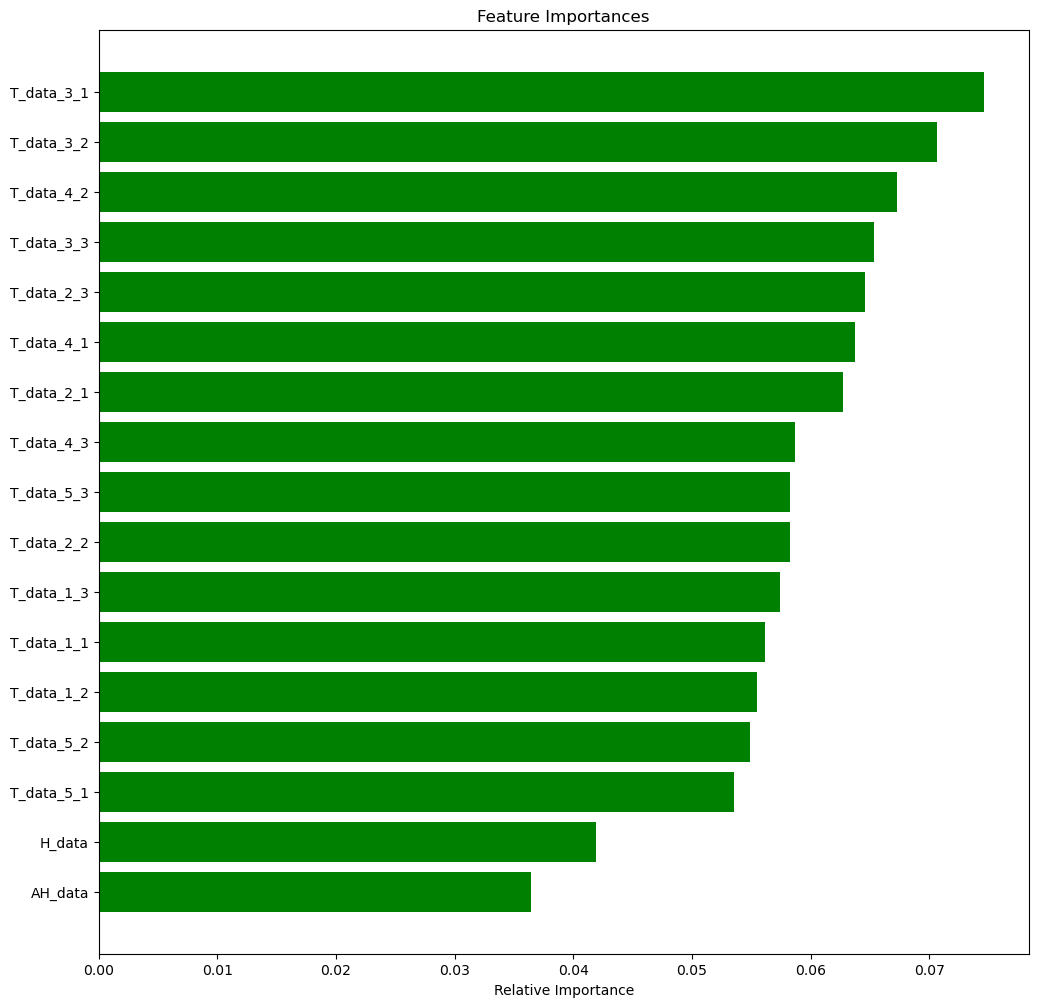

In [65]:
feature = x_train.columns
feature_importance = rf_tune_model.feature_importances_
indices = np.argsort(feature_importance)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importance[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Temperature of chamber 3 with sensor 1 nand 2 and chamber 4 with sensor 2 are the most important features. 

## **Build Fianl Model**

In [71]:
final_model = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='median')),
           ('Random Forest', RandomForestRegressor(
                random_state=1, max_depth= None, max_features='log2', n_estimators=110))]
)

In [72]:
X= kc_df.drop('quality', axis=1)
Y= kc_df['quality']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(x_train.shape, x_test.shape)

(20391, 17) (8740, 17)


In [74]:
final_model.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Random Forest',
                 RandomForestRegressor(max_features='log2', n_estimators=110,
                                       random_state=1))])

In [75]:
fianl_model_perf = performance_mertric(final_model, x_train, y_train)
fianl_model_perf

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,1.289515,1.734782,1.289515,0.98888,0.988871


In [76]:
fianl_model_perf_test = performance_mertric(final_model, x_test, y_test)
fianl_model_perf_test

,MAPE,RMSE,MAE,R-Squared,Adj.R-Squared
0,3.387893,4.475474,3.387893,0.924328,0.924181


## **Conclusion**

- Random forest trained a model with 92% adjusted R-squared in the test data. and 3.38 mean absolute error. 
- Temp data of Chamber 3 sensor 1 and 2 and chamber 4 sensor 2 had the most impact on the defining the quality of the coffee. 